In [3]:
%matplotlib inline


# 手写数字识别


## 1. 数据载入

In [4]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

## 2. 数据分析

In [5]:
print("n_samples: %s" % len(digits.images))

n_samples: 1797


In [6]:
x = digits.images[1]
y = digits.target[1]

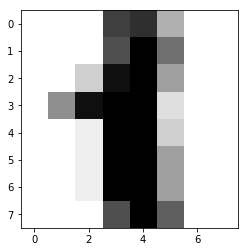

In [7]:
plt.imshow(x, cmap=plt.cm.gray_r, interpolation='nearest')

In [8]:
x.astype(int)

array([[ 0,  0,  0, 12, 13,  5,  0,  0],
       [ 0,  0,  0, 11, 16,  9,  0,  0],
       [ 0,  0,  3, 15, 16,  6,  0,  0],
       [ 0,  7, 15, 16, 16,  2,  0,  0],
       [ 0,  0,  1, 16, 16,  3,  0,  0],
       [ 0,  0,  1, 16, 16,  6,  0,  0],
       [ 0,  0,  1, 16, 16,  6,  0,  0],
       [ 0,  0,  0, 11, 16, 10,  0,  0]])

In [9]:
y

1

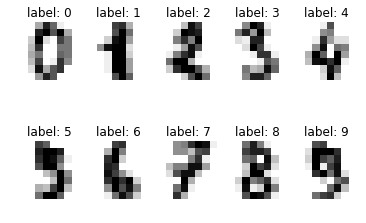

In [10]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 10 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('label: %i' % label)

## 3. 数据预处理

In [11]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

## 4. 模型训练

In [12]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 5. 预测结果评估

In [13]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

In [14]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899




In [15]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


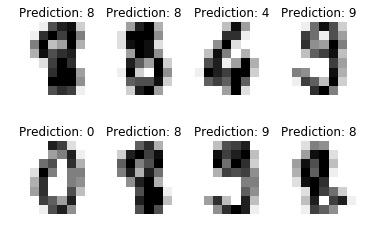

In [16]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

## 模型保存

In [17]:
import pickle

In [18]:
pickle.dump(classifier, open('./model/clf.weights', 'wb'))

In [19]:
model = pickle.load(open('./model/clf.weights', 'rb'))

In [20]:
model.predict(data[0:10])

array([0, 1, 2, 3, 4, 9, 6, 7, 8, 9])